# Ejemplo de Machine Learning. Uso de arboles de clasificación y redes neuronales en el dataset Irishdata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#import graphviz 
#from graphviz import Source
from sklearn.tree import export_graphviz

In [3]:
t0 = time.time()

In [4]:
iris0=pd.read_csv('iris_data.csv',sep=',',decimal='.')

In [5]:
iris0.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.8,6.7,2.0,Virginica
1,6.0,2.2,4.0,1.0,Versicolor
2,6.6,3.0,4.4,1.4,Versicolor
3,6.7,3.3,5.7,2.1,Virginica
4,4.9,3.1,1.5,0.1,Setosa
5,7.1,3.0,5.9,2.1,Virginica
6,6.8,3.2,5.9,2.3,Virginica
7,6.4,2.8,5.6,2.2,Virginica
8,5.1,3.4,1.5,0.2,Setosa
9,4.4,3.2,1.3,0.2,Setosa


In [6]:
#iris0 = datasets.load_iris()
#iris0

In [7]:
print(iris0['species'].value_counts())
iris1=iris0.copy()

Virginica     50
Versicolor    50
Setosa        50
Name: species, dtype: int64


In [8]:
le = preprocessing.LabelEncoder()
iris1['species']=le.fit_transform(iris1['species'])

# iris1['species'].replace(['Virginica','Versicolor','Setosa'], [0,1,2], inplace=True)
# iris1['species'].value_counts()

In [9]:
iris1.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.8,6.7,2.0,2
1,6.0,2.2,4.0,1.0,1
2,6.6,3.0,4.4,1.4,1
3,6.7,3.3,5.7,2.1,2
4,4.9,3.1,1.5,0.1,0
5,7.1,3.0,5.9,2.1,2
6,6.8,3.2,5.9,2.3,2
7,6.4,2.8,5.6,2.2,2
8,5.1,3.4,1.5,0.2,0
9,4.4,3.2,1.3,0.2,0


In [10]:
#%% CREA TRAIN y TEST
X=iris1.drop(['species'], axis=1)
y=iris1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

2    40
1    40
0    40
Name: species, dtype: int64
1    10
2    10
0    10
Name: species, dtype: int64


In [13]:
clf= DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=50, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features=None, random_state=None, max_leaf_nodes=None,min_impurity_decrease=0., min_impurity_split=None, 
                            class_weight=None, ccp_alpha=0.0)

In [14]:
#clf = DecisionTreeClassifier()
# clf= DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=50, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                             max_features=None, random_state=None, max_leaf_nodes=None,min_impurity_decrease=0., min_impurity_split=None, 
#                             class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [15]:
#%% Creando el modelo
classifier= clf.fit(X_train, y_train)

In [16]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_1 <= 3.05
|   |   |   |   |--- feature_3 <= 1.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.65
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.05
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2



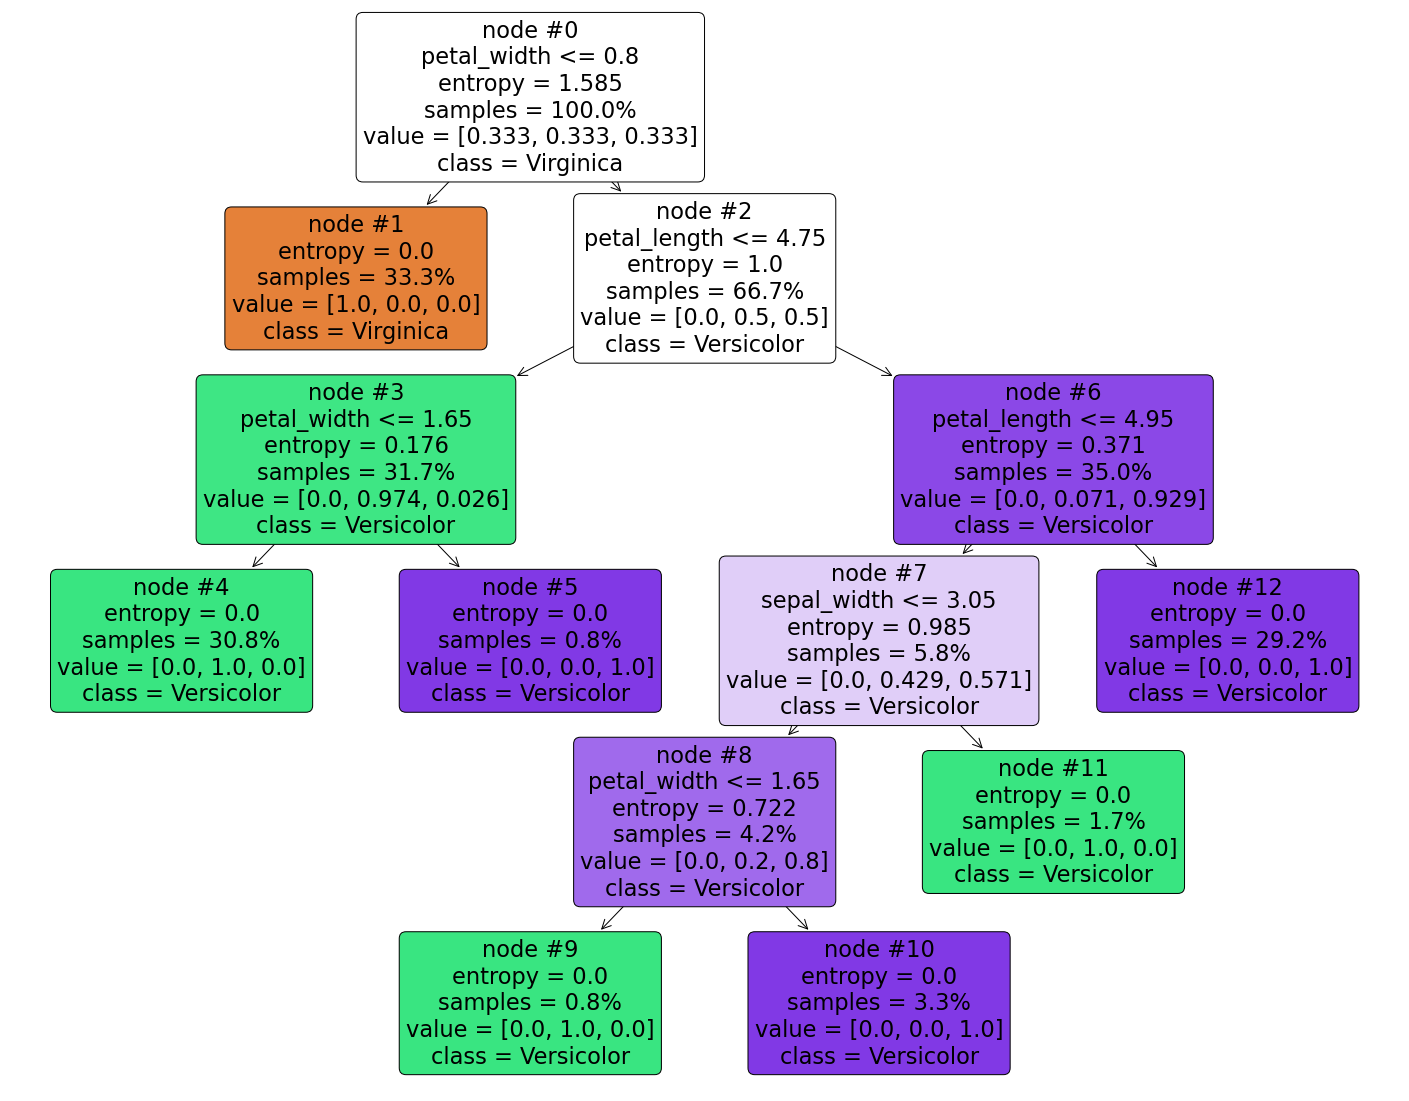

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,feature_names = X.columns, class_names=iris0['species'], label='all', filled = True, impurity=True, node_ids=True, proportion=True, rounded=True)

In [18]:
# Draw graph
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names = X.columns, class_names=iris0['species'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("Irish") 
graph 

NameError: name 'graphviz' is not defined

In [19]:
y_pred = classifier.predict(X_test)   

In [20]:
accuracyCLASE=accuracy_score(y_test, y_pred)*100
confusion_matrix_CLASES=confusion_matrix(y_test, y_pred)
p = classifier.predict_proba(X_test)

In [21]:
accuracyCLASE

93.33333333333333

In [22]:
p

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
print(confusion_matrix_CLASES)

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


In [24]:
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division="warn"))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# Ahora usemos una red neuronal!!!

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

scaler.fit(X_train)  

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [27]:
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)

clfNN.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [28]:
y_pred_NN=clfNN.predict(X_test)

In [29]:
y_pred_NN

array([1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 2])

In [30]:
accuracyCLASE_NN=accuracy_score(y_test, y_pred_NN)*100
confusion_matrix_CLASES_NN=confusion_matrix(y_test, y_pred_NN)

In [31]:
confusion_matrix_CLASES_NN

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

# Ahora una red neuronal profunda (Deep Learning)

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential([
   layers.Dense(100, activation='relu', input_shape=(4,)),
   layers.Dense(20, activation='relu'),
   layers.Dense(3, activation='softmax')
 ])

 # compile the keras model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model = keras.Sequential()

#model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(100, input_dim=4, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# compile the keras model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
# fit the keras model on the dataset
#model.fit(X_train, y_train, epochs=10, batch_size=10)
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 1.1153 - accuracy: 0.2879
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0180 - accuracy: 0.3412
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9618 - accuracy: 0.4167
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8952 - accuracy: 0.4602
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8464 - accuracy: 0.4965
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8079 - accuracy: 0.6435
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.7592 - accuracy: 0.8052
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.7507 - accuracy: 0.7765
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.8425
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.8490
Epoch 11/50
4/4 [======================

In [36]:
y_pred_DNN_probas = model.predict(X_test)

In [37]:
y_pred_DNN_probas

array([[2.50678677e-02, 8.08066308e-01, 1.66865855e-01],
       [9.52800794e-04, 1.02642179e-01, 8.96404982e-01],
       [2.81469092e-05, 1.00977020e-02, 9.89874125e-01],
       [6.93543348e-04, 2.45633513e-01, 7.53672898e-01],
       [1.33948610e-03, 2.76931465e-01, 7.21729100e-01],
       [9.96169984e-01, 3.82764055e-03, 2.31834974e-06],
       [1.46894388e-06, 6.68658642e-03, 9.93311942e-01],
       [3.67268478e-03, 9.82909739e-01, 1.34175932e-02],
       [1.41121149e-02, 7.47689784e-01, 2.38198116e-01],
       [9.90165055e-01, 9.81220230e-03, 2.27424734e-05],
       [8.26369505e-03, 8.71490657e-01, 1.20245695e-01],
       [6.39979728e-04, 8.76571238e-02, 9.11702871e-01],
       [1.09706691e-03, 9.51224193e-02, 9.03780520e-01],
       [6.50705174e-02, 8.81865382e-01, 5.30641302e-02],
       [9.91096258e-01, 8.88337847e-03, 2.03376676e-05],
       [9.92960155e-01, 7.02546583e-03, 1.43386133e-05],
       [1.42004888e-03, 7.58472204e-01, 2.40107685e-01],
       [9.85917389e-01, 1.40423

In [38]:
# Virginica= 2
# Versicolor= 1
# Setosa= 0

In [39]:
y_pred_DNN = np.argmax(y_pred_DNN_probas,axis=1)

In [40]:
y_pred_DNN

array([1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 2], dtype=int64)

In [41]:
accuracyCLASE_Depp_NN=accuracy_score(y_test, y_pred_DNN)*100
accuracyCLASE_Depp_NN

93.33333333333333

In [42]:
confusion_matrix_CLASES_Depp_NN=confusion_matrix(y_test, y_pred_DNN)

In [43]:
confusion_matrix_CLASES_Depp_NN

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [44]:
t1 = time.time()
totalTime = t1-t0
totalTimeMin=totalTime/60

In [45]:
print('El tiempo total en segundos ha sido de', totalTime)

El tiempo total en segundos ha sido de 297.3471064567566


In [46]:
print('El tiempo total en minutos ha sido de', totalTimeMin) 

El tiempo total en minutos ha sido de 4.95578510761261


## También se pueden escribir ecuaciones usando el formato LaTex, por ejemplo, la formula general para encontrar las raices de una ecuación de segundo grado es $$x=\dfrac{-b\pm \sqrt{b^2-4ac}}{2a}$$

## Por otro lado, se puede escribir ecuaciones en línea, como ejemplo se muestra $MSE=(y-\hat{y})^2$. La funció $$f(x)=(x-2)^2=x^2-4x+4$$